# So this is the second notebook of the project. I'll be training the model for multiple iterations and getting rid of any errors that would have caused my model to underperform.

In [1]:
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
images = []
labels = []

In [4]:
data_path = ".\\dataset\\cifar-10-batches-py\\"

In [5]:
for i in range(1, 6):
    batch = unpickle(os.path.join(data_path, f"data_batch_{i}"))
    images.append(batch[b'data'])
    labels.append(batch[b'labels'])

In [6]:
train_images = np.vstack(images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print(train_images.shape)
print(len(labels[1]))

(50000, 32, 32, 3)
10000


In [7]:
the_label = np.hstack(labels).reshape(50000, 1)
print(the_label.shape)

(50000, 1)


In [8]:
test_batch = unpickle(os.path.join(data_path, f"test_batch"))
test_image = test_batch[b'data']
test_label = test_batch[b'labels']
test = test_image.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [9]:
image_indice = 1111

### Let's work a bit more with image processing part

In [10]:
the_image = train_images[image_indice]
print(the_image)

[[[104  99  87]
  [ 67  66  56]
  [ 36  37  27]
  ...
  [117 105  80]
  [ 44  35  24]
  [ 90  81  61]]

 [[106 102  90]
  [ 70  69  57]
  [ 32  33  20]
  ...
  [123 109  81]
  [ 68  55  40]
  [112  98  74]]

 [[107 104  89]
  [ 73  71  58]
  [ 34  36  24]
  ...
  [124 109  80]
  [ 89  74  55]
  [107  91  70]]

 ...

 [[154 127  95]
  [163 138 106]
  [168 146 119]
  ...
  [174 139  73]
  [173 135  67]
  [172 134  63]]

 [[166 141 105]
  [175 148 111]
  [170 148 119]
  ...
  [176 140  81]
  [176 140  80]
  [168 135  74]]

 [[164 136  95]
  [168 140 101]
  [164 138 104]
  ...
  [181 145  90]
  [176 145  94]
  [172 141  88]]]


### Normalizing with respect to mean and standard deviation

In [11]:
# # finding the mean and standard deviation along a particular axis
# mean = np.mean(the_image, axis=(0, 1))
# std = np.std(the_image, axis=(0, 1))

# print(mean)
# print(std)

# normalized_image = (the_image - mean) / std
# print(normalized_image)

# grey = np.dot(normalized_image, [0.2989, 0.5870, 0.1140])
# again_mean = np.mean(grey)
# again_std = np.std(grey)

# norm = (grey - again_mean) / again_std
# print(norm)
# print(norm.shape)
# the_image = norm

### Normalizing in the range of [-1, 1]

In [12]:
# normalized = (the_image / 127.5) - 1
# print(normalized)
# print(normalized.shape)

# grey = np.dot(normalized, [0.2989, 0.5870, 0.1140])
# mean = np.mean(grey)
# std = np.std(grey)

# norm = (grey - mean) / std
# print(norm)
# print(norm.shape)
# the_image = norm

### Normalizing in the range of [0, 1]

In [13]:
the_image = train_images[image_indice]
the_image = the_image / 255. #trying with normalization
the_image = the_image[:, :, 0]
the_image.shape

(32, 32)

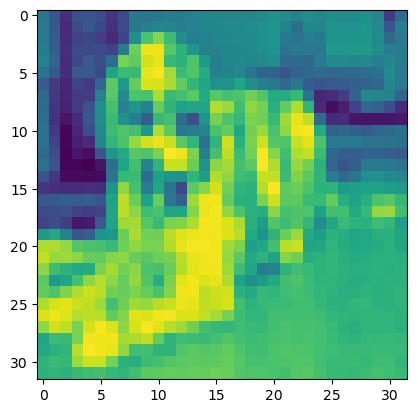

In [14]:
plt.imshow(the_image)
plt.show()

In [15]:
# n = 1 * 3 * 3  # For convs1
# convs1 = np.random.randn(2, 1, 3, 3) * np.sqrt(2 / n)
# convs1

In [16]:
# n = 2 * 3 * 3  # For convs2
# convs2 = np.random.randn(4, 2, 3, 3) * np.sqrt(2 / n)
# convs2

In [17]:
convs1 = np.array(
    [
        [
            [
                [ 0.13946585, -0.21471022,  0.93753301],
                [ 0.4994047 ,  0.26616005,  0.48099313],
                [ 0.1483146 ,  0.42223968, -0.64469044]]],

       [
           [
               [-0.05734518, -0.71556418,  0.31234046],
               [-0.0394651 , -0.55097721,  0.23660937],
               [-0.64564189, -1.03205081, -0.76989072]
           ]
       ]
    ])

convs2 = np.array(
    [
        [
            [
                [-0.25814897,  0.01838183, -0.15120541],
                [-0.2365235 , -0.56304619,  0.13380695],
                [-0.33414971,  0.94886685, -0.08960969]],

            [
                [-0.25372391,  0.14511064,  0.39024253],
                [ 0.35404207, -0.2659075 ,  0.04602082],
                [-0.44046035,  0.20010614,  0.29268264]
            ]
        ],
        [
            [
               [-0.12676292,  0.08519918,  0.15238209],
               [ 0.2278734 ,  0.24589808,  0.21179249],
               [ 0.04261437,  0.34631843,  0.00952802]
            ],
            [
               [-0.28677842,  0.36630284,  0.15388597],
               [-0.12923126, -0.12401664, -0.23906797],
               [ 0.29470837,  0.22153372, -0.45090181]
            ]
        ],
        [
            [
                [-0.09455403,  0.09516843,  0.60725986],
                [ 0.54091227, -0.64003007,  0.60246204],
                [ 0.08020973,  0.34449927, -0.70016596]
            ],
            [
                [-0.33702602, -0.63168092, -0.29209125],
                [ 0.53846971, -0.5397904 , -0.2510981 ],
                [-0.60180674, -0.41365405,  0.06211353]
            ]
        ],
        [
           [
               [-0.61133665,  0.08813806, -0.81126952],
               [ 0.13471821,  0.47912855,  0.23711187],
               [ 0.52882139,  0.13791104,  0.31937779]
           ],
           [
               [ 0.01403245, -0.38845595, -0.11938587],
               [-0.17921749, -0.04845909, -0.18635919],
               [ 0.30616391,  0.23832606, -0.22556262]
           ]
        ]
    ])
print(convs1.shape)
print(convs2.shape)

(2, 1, 3, 3)
(4, 2, 3, 3)


In [18]:
bias1 = np.array([0., 0.])
bias2 = np.array([0., 0., 0., 0.])

print(bias1.shape)
print(bias2.shape)

(2,)
(4,)


In [19]:
the_image = the_image.reshape(1, 32, 32)
print(the_image.shape)

(1, 32, 32)


In [20]:
feature_map = np.zeros((2, 30, 30))
# the shape is 30,30 because the new feature map's shape will be 30,30

In [21]:
# def relu(z):
#     return np.maximum(0, z)

#relu but its leaky again
def relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

In [22]:
max_pool = np.ones((2, 15, 15))

In [23]:
feature_map_ii = np.zeros((4, 12, 12))

In [24]:
max_pool_ii = np.ones((4, 6, 6))

In [25]:
# def diff_relu(z):
#     return z > 0
def diff_relu(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

In [26]:
# w1 = np.random.rand(50, 144)*0.01
# b1 = np.zeros((50, 1))
# w2 = np.random.rand(50, 10)*0.01
# b2 = np.zeros((10, 1))


#trying different initialization method
w1 = np.random.randn(50, 144)*np.sqrt(2/144)
b1 = np.zeros((50, 1))
# w2 = np.random.randn(50, 10)*np.sqrt(2/50)
# weights seem to blow up when we're using he initialization so we're going to use xavier initialization in this layer
w2 = np.random.randn(50, 10) * np.sqrt(1 / (50 + 10))
b2 = np.zeros((10, 1))

In [27]:
# def softmax(z):
#     probs = np.exp(z) / sum(np.exp(z))
#     return probs


# # stable version of the softmax function

# # def softmax(x):
# #     shifted = x - np.max(x, axis=0, keepdims=True)
# #     exp_x = np.exp(shifted)
# #     return exp_x / np.sum(exp_x, axis=0, keepdims=True)



#27th march, 2025. Stabalizing the softmax
def softmax(z):
    z_max = np.max(z, axis=0, keepdims=True)  # Find max along each column
    exp_z = np.exp(z - z_max)  # Subtract max before exp
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)  # Normalize

In [28]:
def forward(w1, b1, w2, b2, data):
    z1 = np.dot(w1, data) + b1
    a1 = relu(z1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = softmax(z2)
    return a2, z1, a1, z2

In [29]:
def the_value(label):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return labels[label]

In [30]:
total_classes = 10

hot_encoded_arr = np.zeros((total_classes, 1))
hot_encoded_arr[the_label[image_indice][0]] = 1  # put the corresponding value in the hot_encoded_arr as 1

In [31]:
print(hot_encoded_arr)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [32]:
def max_pool_backward(dp2, relued_again):
    d_relued_again = np.zeros_like(relued_again)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                #fuck it. I just can't find the function to find the index of the maximum array or my brain isn't working rn, so m gonna use if here
                if the_max == relued_again[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued_again[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued_again[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued_again[k][i_is][j_is] = dp2[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued_again

In [33]:
def max_pool_backward1(dp, relued):
    d_relued = np.zeros_like(relued)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(2):
        a = 0
        for i in range(0, 15, 2):
            b = 0
            for j in range(0, 15, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                if the_max == relued[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued[k][i_is][j_is] = dp[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued

In [34]:
#for layer 1
def ahead(w1, b1, w2, b2, convs1, bias1, convs2, bias2):
    for k in range(2):
        for l in range(1):
            for i in range(30):
                for j in range(30):
                    feature_map[k][i][j] = (the_image[l][i][j]*convs1[k][l][0][0] + the_image[l][i][j+1]*convs1[k][l][0][1] + the_image[l][i][j+2]*convs1[k][l][0][2]) + (the_image[l][i+1][j]*convs1[k][l][1][0] + the_image[l][i+1][j+1]*convs1[k][l][1][1] + the_image[l][i+1][j+2]*convs1[k][l][1][2]) + (the_image[l][i+2][j]*convs1[k][l][2][0] + the_image[l][i+2][j+1]*convs1[k][l][2][1] + the_image[l][i+2][j+2]*convs1[k][l][2][2]) + bias1[k]
    
    relued = relu(feature_map)
    
    
    for k in range(2):
        a = 0
        for i in range(0, 30, 2):
            b = 0
            for j in range(0, 30, 2):
                max_pool[k][a][b] = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                b += 1
            a += 1
    
    #for layer 2        
    for k in range(4):
        for l in range(1):
            for i in range(12):
                for j in range(12):
                    feature_map_ii[k][i][j] = (max_pool[l][i][j]*convs2[k][l][0][0] + max_pool[l][i][j+1]*convs2[k][l][0][1] + max_pool[l][i][j+2]*convs2[k][l][0][2] + max_pool[l][i+1][j]*convs2[k][l][1][0] + max_pool[l][i+1][j+1]*convs2[k][l][1][1] + max_pool[l][i+1][j+2]*convs2[k][l][1][2] + max_pool[l][i+2][j]*convs2[k][l][2][0] + max_pool[l][i+2][j+1]*convs2[k][l][2][1] + max_pool[l][i+2][j+2]*convs2[k][l][2][2]) + (max_pool[l+1][i][j]*convs2[k][l+1][0][0] + max_pool[l+1][i][j+1]*convs2[k][l+1][0][1] +  max_pool[l+1][i][j+2]*convs2[k][l+1][0][2] + max_pool[l+1][i+1][j]*convs2[k][l+1][1][0] + max_pool[l+1][i+1][j+1]*convs2[k][l+1][1][1] + max_pool[l+1][i+1][j+2]*convs2[k][l+1][1][2] + max_pool[l+1][i+2][j]*convs2[k][l+1][2][0] + max_pool[l+1][i+2][j+1]*convs2[k][l+1][2][1] + max_pool[l+1][i+2][j+2]*convs2[k][l+1][2][2]) + bias2[k]
    
    relued_again = relu(feature_map_ii)
    
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                max_pool_ii[k][a][b] = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                b += 1
            a += 1
    
    
    #NN layer
    flattened = max_pool_ii.flatten()
    flattened = flattened.reshape(144, 1)
    
    the_val, z1, a1, z2 = forward(w1, b1, w2, b2, flattened)

    prediction_num = np.argmax(the_val, 0)
    a = prediction_num[0]

    predicted_num = np.argmax(the_val, 0)
    predicted_int = predicted_num[0]
    prediction = the_value(predicted_int)

    dz2 = hot_encoded_arr - the_val
    num_data = 1

    dw2 = 1/num_data * dz2.dot(a1.T)
    db2 = 1/num_data * np.sum(dz2)

    dz1 = w2.dot(dz2)*diff_relu(z1)

    dw1 = 1/num_data * dz1.dot(flattened.T)
    db1 = 1/num_data * np.sum(dz1)

    #CNN layer
    df = dw1.T.dot(dz1)

    dp2 = df.reshape((4, 6, 6))

    d_relued_again = max_pool_backward(dp2, relued_again)

    diff_relu(d_relued_again)

    new_d_relued_again = np.pad(d_relued_again, ((0, 0), (0, 1), (0, 1)), mode='constant', constant_values=0)

    d_filter = np.zeros((4, 2, 3, 3))

    for i in range(4): #denotes the number of filters
        for j in range(2): #denotes the depth of image that we're convolving over
            for k in range(3): #the number of times the strides are taken along the vertical direction
                for l in range(3): #the number of times the strides are taken along the horizontal direction
                    addition = 0 #the gradient to be added to the image
                    for m in range(13):
                        for n in range(13):
                            addition += max_pool[j][m+k][n+l] * new_d_relued_again[i][m][n]
                    d_filter[i][j][k][l] = addition

    d_bias2 = np.sum(d_relued_again)

    padded_d_relued_again = np.pad(new_d_relued_again, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

    rotated_convs2 = np.zeros((4, 2, 3, 3))

    for i in range(4):
        for j in range(2):
            k = np.flip(convs2[i][j], axis=1)
            l = np.flip(k, axis=0)
            rotated_convs2[i][j] = l

    d_layer1 = np.zeros((2, 15, 15)) # the gradient to get propagated back to the first layer.

    for i in range(4): # denotes the current iteration number of filter number and gradient number
        for j in range(2): # denotes the depth of filter used
            for k in range(15):
                for l in range(15):
                    # d_layer1[j][k][l] += rotated_convs2[i][j][0][0]*padded_d_relued_again[i][k][l] + rotated_convs2[i][j][0][1]*padded_d_relued_again[i][k][l+1] + rotated_convs2[i][j][0][2]*padded_d_relued_again[i][k][l+2] + rotated_convs2[i][j][1][0]*padded_d_relued_again[i][k+1][l] + rotated_convs2[i][j][1][1]*padded_d_relued_again[i][k+1][l+1] + rotated_convs2[i][j][1][2]*padded_d_relued_again[i][k+1][l+2] + rotated_convs2[i][j][2][0]*padded_d_relued_again[i][k+2][l] + rotated_convs2[i][j][2][1]*padded_d_relued_again[i][k+2][l+1] + rotated_convs2[i][j][2][2]*padded_d_relued_again[i][k+2][l+2]
                    for m in range(3):
                        for n in range(3):
                            d_layer1[j][k][l] += (rotated_convs2[i][j][m][n] * padded_d_relued_again[i][k+m][l+n])

    d_relued = max_pool_backward1(d_layer1, relued)

    diff_relu(d_relued)

    d_bias1 = np.sum(d_relued)

    d_convs1 = np.zeros((2, 1, 3, 3))

    for i in range(2): #denotes the number of filters
        for j in range(1): #denotes the depth of image that we're convolving over
            for k in range(3): #the number of times the strides are taken along the vertical direction
                for l in range(3): #the number of times the strides are taken along the horizontal direction
                    addition = 0 #the gradient to be added to the image
                    for m in range(30):
                        for n in range(30):
                            addition += the_image[j][m+k][n+l] * d_relued[i][m][n]
                    d_convs1[i][j][k][l] = addition

    # return all the gradients for subtraction
    # I should probably return the gradients serially from the backwards layer to the front layer in order to not miss any
    return dw1, db1, dw2, db2, d_convs1, d_bias1, d_filter, d_bias2

In [44]:
#to see if the weights and biases are actually changing
w1_prev = w1
w2_prev = w2
b1_prev = b1
b2_prev = b2
convs1_prev = convs1
bias1_prev = bias1
convs2_prev = convs2
bias2_prev = bias2

In [45]:
# print(w1_prev)
# print(w2_prev)
# print(b1_prev)
# print(b2_prev)
# print(convs1_prev)
# print(bias1_prev)
# print(convs2_prev)
# print(bias2_prev)

In [46]:
RATE = 0.0005
for i in range(500):
    dw1, db1, dw2, db2, d_convs1, d_bias1, d_convs2, d_bias2 =  ahead(w1, b1, w2, b2, convs1, bias1, convs2, bias2) #pass the parameters to the function
    #perform the update
    w1 = w1 - RATE*dw1
    w2 = w2 - RATE*dw2.T
    b1 = b1 - RATE*db1
    b2 = b2 - RATE*db2
    convs1 = convs1 - RATE*d_convs1
    bias1 = bias1 - RATE*d_bias1
    convs2 = convs2 - RATE*d_convs2
    bias2 = bias2 - RATE*d_bias2

In [47]:
#weights and biases after update
w1_after = w1
w2_after = w2
b1_after = b1
b2_after = b2
convs1_after = convs1
bias1_after = bias1
convs2_after = convs2
bias2_after = bias2

In [48]:
# print(w1_prev == w1_after)
# print(w2_prev == w2_after)
# print(b1_prev == b1_after)
# print(b2_prev == b2_after)
# print(convs1_prev == convs1_after)
# print(bias1_prev == bias1_after)
# print(convs2_prev == convs2_after)
# print(bias2_prev == bias2_after)

In [49]:
print(w1_after)
print(w2_after)
print(b1_after)
print(b2_after)
print(convs1_after)
print(bias1_after)
print(convs2_after)
print(bias2_after)

[[-0.13701971  0.11439613  0.15112957 ...  0.04645181  0.36379874
  -0.26672822]
 [-0.28241016  0.03512593  0.06198502 ...  0.12243552 -0.08413029
   0.08627637]
 [-0.04976467 -0.03212716  0.17914572 ... -0.18758901 -0.02721036
   0.17267585]
 ...
 [-0.21504127  0.11026798 -0.01169689 ... -0.08786592  0.06902119
   0.08894773]
 [ 0.08020299 -0.03954875 -0.12162544 ... -0.13306551 -0.38834746
   0.05361095]
 [-0.01598337  0.0482261   0.10162243 ... -0.3120008   0.09557628
  -0.15398754]]
[[-1.25352405e-02  6.26491427e-03 -1.94653680e-01  4.81738086e-02
   9.92392140e-02  1.51294162e-01  3.04342689e-02 -1.07783828e-01
  -1.53815232e-01 -7.48859095e-02]
 [-1.52014658e-02 -2.38893903e-01  2.13969115e-02 -1.23406577e-01
   5.74771071e-02  4.93025149e-02 -2.36104161e-01  1.14722816e-01
  -4.23221338e-02 -1.40487029e-01]
 [-1.20630735e-01  8.57751745e-02  1.13334495e-01 -1.60174569e-01
  -1.06857704e-01 -1.09231873e-01 -2.96499807e-01  1.89698110e-01
  -6.66167433e-02  1.08086270e-01]
 [ 2.42

In [50]:
print(np.linalg.norm(w1_prev - w1_after))
print(np.linalg.norm(w2_prev - w2_after))
print(np.linalg.norm(convs1_prev - convs1_after))
print(np.linalg.norm(convs2_prev - convs2_after))

0.036073494109294446
0.011762374800960582
0.021501069194030987
0.027957634093209272


In [51]:
def test(w1, b1, w2, b2, convs1, bias1, convs2, bias2):
    for k in range(2):
        for l in range(1):
            for i in range(30):
                for j in range(30):
                    feature_map[k][i][j] = (the_image[l][i][j]*convs1[k][l][0][0] + the_image[l][i][j+1]*convs1[k][l][0][1] + the_image[l][i][j+2]*convs1[k][l][0][2]) + (the_image[l][i+1][j]*convs1[k][l][1][0] + the_image[l][i+1][j+1]*convs1[k][l][1][1] + the_image[l][i+1][j+2]*convs1[k][l][1][2]) + (the_image[l][i+2][j]*convs1[k][l][2][0] + the_image[l][i+2][j+1]*convs1[k][l][2][1] + the_image[l][i+2][j+2]*convs1[k][l][2][2]) + bias1[k]
    
    relued = relu(feature_map)
    
    
    for k in range(2):
        a = 0
        for i in range(0, 30, 2):
            b = 0
            for j in range(0, 30, 2):
                max_pool[k][a][b] = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                b += 1
            a += 1
    
    #for layer 2        
    for k in range(4):
        for l in range(1):
            for i in range(12):
                for j in range(12):
                    feature_map_ii[k][i][j] = (max_pool[l][i][j]*convs2[k][l][0][0] + max_pool[l][i][j+1]*convs2[k][l][0][1] + max_pool[l][i][j+2]*convs2[k][l][0][2] + max_pool[l][i+1][j]*convs2[k][l][1][0] + max_pool[l][i+1][j+1]*convs2[k][l][1][1] + max_pool[l][i+1][j+2]*convs2[k][l][1][2] + max_pool[l][i+2][j]*convs2[k][l][2][0] + max_pool[l][i+2][j+1]*convs2[k][l][2][1] + max_pool[l][i+2][j+2]*convs2[k][l][2][2]) + (max_pool[l+1][i][j]*convs2[k][l+1][0][0] + max_pool[l+1][i][j+1]*convs2[k][l+1][0][1] +  max_pool[l+1][i][j+2]*convs2[k][l+1][0][2] + max_pool[l+1][i+1][j]*convs2[k][l+1][1][0] + max_pool[l+1][i+1][j+1]*convs2[k][l+1][1][1] + max_pool[l+1][i+1][j+2]*convs2[k][l+1][1][2] + max_pool[l+1][i+2][j]*convs2[k][l+1][2][0] + max_pool[l+1][i+2][j+1]*convs2[k][l+1][2][1] + max_pool[l+1][i+2][j+2]*convs2[k][l+1][2][2]) + bias2[k]
    
    relued_again = relu(feature_map_ii)
    
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                max_pool_ii[k][a][b] = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                b += 1
            a += 1
    
    
    #NN layer
    flattened = max_pool_ii.flatten()
    flattened = flattened.reshape(144, 1)
    
    the_val, z1, a1, z2 = forward(w1, b1, w2, b2, flattened)

    prediction_num = np.argmax(the_val, 0)
    a = prediction_num[0]

    predicted_num = np.argmax(the_val, 0)
    predicted_int = predicted_num[0]
    prediction = the_value(predicted_int)

    return prediction

In [52]:
val = test(w1_after, b1_after, w2_after, b2_after, convs1, bias1, convs2, bias2)
print(val)

frog
